# The Sparks Foundation - GRIP

# Data Science and Business Analytics Intern - AUG2021

## Author - Shreyanshu

### Task - Prediction using decision tree classifier

**The purpose of this project is to build prediction model for Iris dataset using decision tree classifier and visualizing the tree. Link to dataset = https://bit.ly/3kXTdox**

In [1]:
import pandas as pd

In [2]:
#importing pandas dataframe and dropping the Id coloumn as it is not required
df = pd.read_csv("iris.csv")
df.drop(['Id'],axis='columns',inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#checking if some abnormal value exists in the above coloumns
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
inputs = df.drop('Species',axis='columns')
target = df.Species

In [5]:
target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
#The machine learning model works on numeric values. Therefore mapping values 1,2,3 to the 3 species
target = target.map({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})

In [7]:
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [8]:
#Splitting dataset into training and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [9]:
model.fit(inputs, target)

DecisionTreeClassifier()

In [10]:
model.score(inputs,target)

1.0

In [11]:
model.predict([[5.84,3.054,3.75,1.19]])

array([2], dtype=int64)

In [12]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

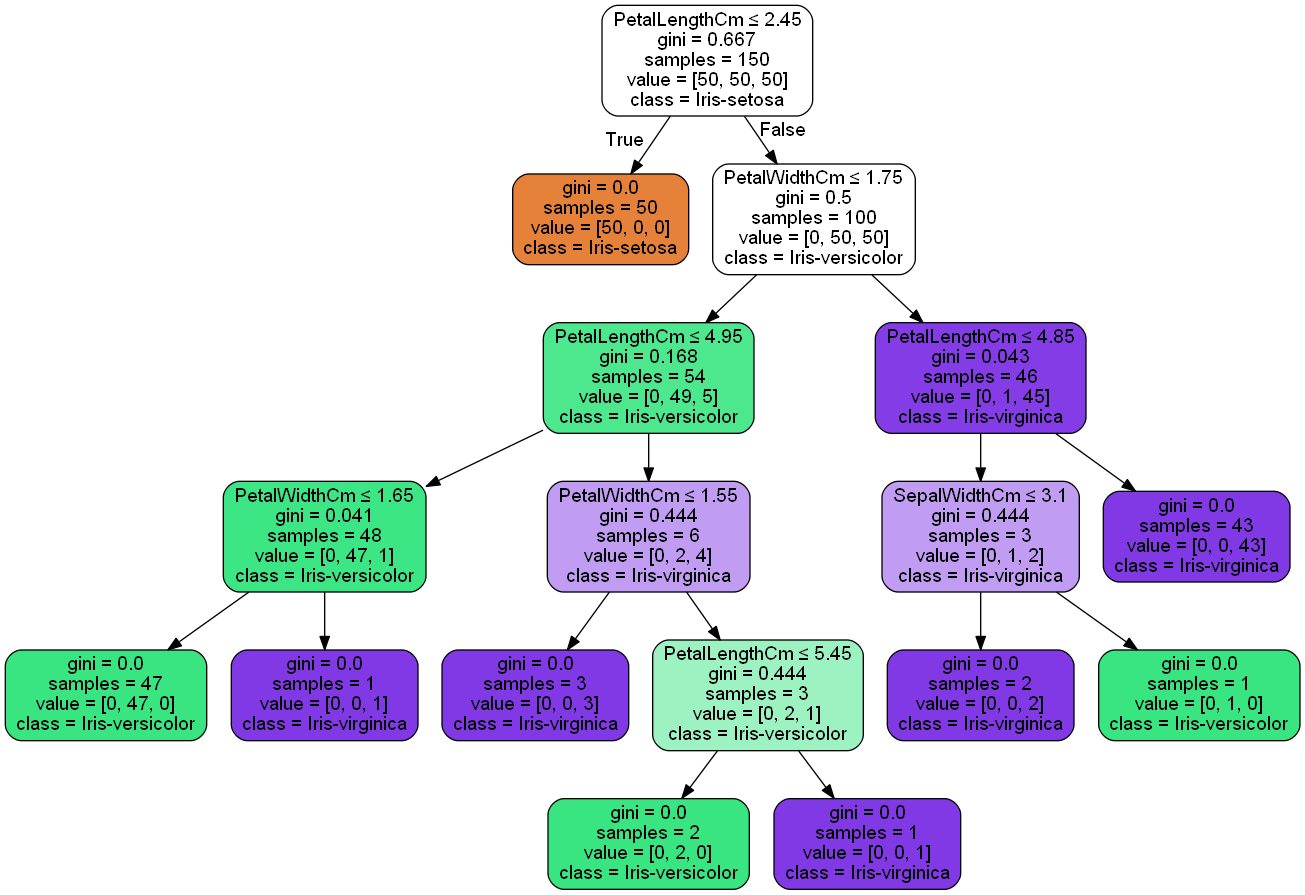

In [13]:
#Visualizing the decision tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=feature_cols,  
                filled=True, rounded=True, class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
#Predicting for some values
model.predict([[3,2,1,1]])

array([1], dtype=int64)